In [ ]:
andas.DataFrame.corr() 실제 코드 (간략화 버전)
python
복사
편집
def corr(self, method="pearson", min_periods=1, numeric_only=False):
    """
    Compute pairwise correlation of columns, excluding NA/null values.

    Parameters
    ----------
    method : {'pearson', 'kendall', 'spearman'}
        Method of correlation:
            * pearson : standard correlation coefficient
            * kendall : Kendall Tau correlation coefficient
            * spearman : Spearman rank correlation
    min_periods : int, optional
        Minimum number of observations required per pair of columns
        to have a valid result.
    numeric_only : bool, default False
        Include only float, int, boolean data.

    Returns
    -------
    DataFrame
        Correlation matrix.
    """
    data = self._get_numeric_data() if numeric_only else self
    cols = data.columns
    mat = data.to_numpy()

    if method == "pearson":
        correl = nanops.nancorr(mat, minp=min_periods)
    elif method == "spearman":
        correl = nanops.nancorr(mat.rank(axis=0), minp=min_periods)
    elif method == "kendall":
        from scipy.stats import kendalltau

        correl = np.zeros((len(cols), len(cols)))
        for i, j in combinations(range(len(cols)), 2):
            mask = ~np.isnan(mat[:, i]) & ~np.isnan(mat[:, j])
            if mask.sum() >= min_periods:
                tau, _ = kendalltau(mat[mask, i], mat[mask, j])
                correl[i, j] = correl[j, i] = tau
        np.fill_diagonal(correl, 1.0)
    else:
        raise ValueError(f"Unknown method: {method}")

    return DataFrame(correl, index=cols, columns=cols)

In [8]:
from sklearn.datasets import load_iris
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Iris 데이터셋 로드
iris = load_iris()


In [ ]:
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [49]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [ ]:
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df.columns = ['sepal_length','sepal_width','petal_length','petal_width']
df['species'] = iris.target
df['species'] = df['species'].apply(lambda x : iris.target_names[x])

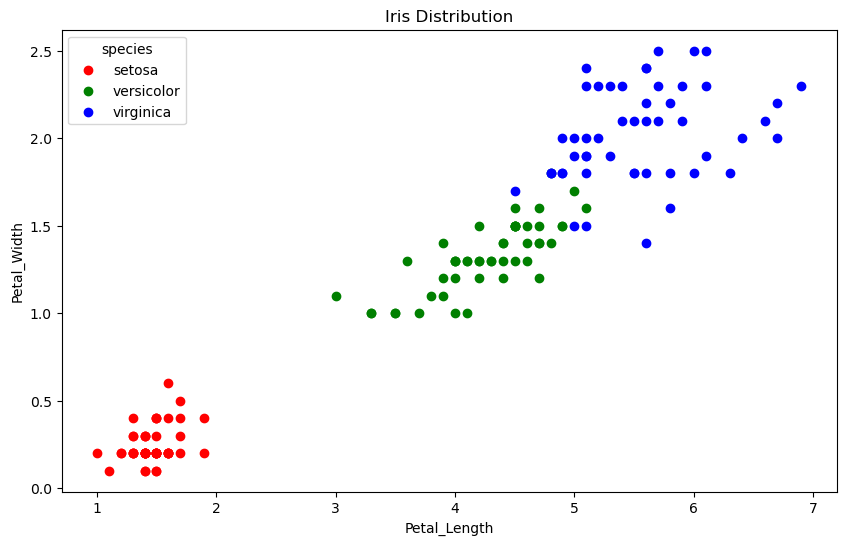

In [11]:
species_unique = df.species.unique()
colors = ['red','green','blue']

color_maps = dict(zip(species_unique,colors))

plt.figure(figsize=(10,6))

for species in color_maps:
    subset = df[df['species']== species]
    plt.scatter(
        subset.petal_length,
        subset.petal_width,
        c = color_maps[species],
        label = species,
        marker='o'
    )
plt.title("Iris Distribution")
plt.legend(title="species")
plt.xlabel("Petal_Length"),
plt.ylabel("Petal_Width")
plt.show()

In [7]:
color_maps

{'setosa': 'red', 'versicolor': 'green', 'virginica': 'blue'}

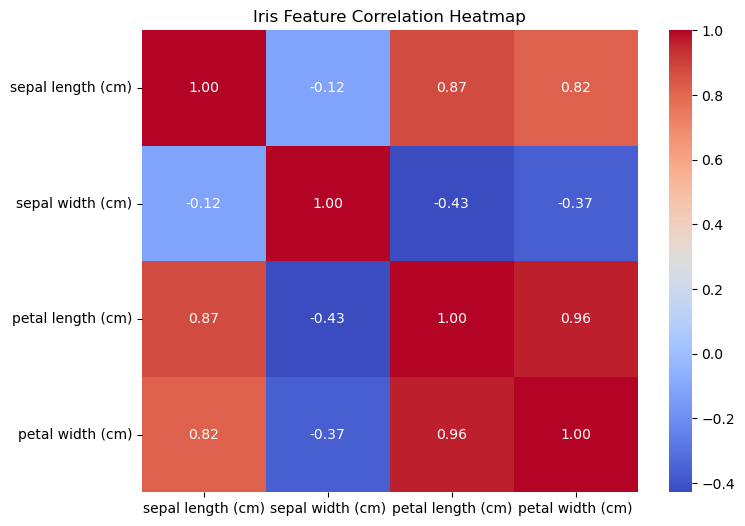

In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

# 1️⃣ Iris 데이터셋 불러오기
iris = load_iris()

# 2️⃣ DataFrame으로 변환
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['species'] = pd.Categorical.from_codes(iris.target, iris.target_names)

# 3️⃣ 상관계수 행렬 계산
corr_matrix = df.iloc[:, :-1].corr()  # species 컬럼 제외

# 4️⃣ 히트맵 시각화
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Iris Feature Correlation Heatmap')
plt.show()

In [13]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [14]:
iris.target, iris.target_names

(array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]),
 array(['setosa', 'versicolor', 'virginica'], dtype='<U10'))

In [16]:
df.iloc[:, :-1]

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3
